In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_excel(r"c:\Users\fer_l\OneDrive\Área de Trabalho\Portifolio Py\EDA - Global Terrorism Database\terrorism_data.xlsx")


Let's start by inspecting the dataset information, check/remove null values, remove duplicates and evaluate outlier removal.

In [3]:
#inspectin database
print(df.shape)
print(df.columns)
print(df.head)

(181690, 135)
Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)
<bound method NDFrame.head of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181685  201712310022   2017      12    31        NaN         0        NaN   
181686  201712310029   2017      12    31

In [4]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816900e+05,181690.000000,181690.000000,181690.000000,181690.000000,181690.000000,181690.000000,1.771340e+05,1.771330e+05,181684.000000,...,1.041000e+03,3.000000e+02,4.970000e+02,292.000000,6685.000000,6161.000000,138331.000000,138331.000000,138331.000000,138331.000000
mean,2.002705e+11,2002.638956,6.467263,15.505614,0.045346,131.968705,7.160922,2.055297e+07,2.470296e+07,1.451454,...,3.095045e+06,7.145944e+05,5.285444e+05,421.863014,4.520120,-26.340205,-5.065820,-5.015058,0.094599,-4.414874
std,1.325960e+09,13.259456,3.388308,8.814060,0.208063,112.414811,2.933408,1.892426e+07,5.404482e+07,0.995432,...,3.311326e+07,7.787929e+06,2.885991e+06,3995.546426,2.045727,58.016373,4.505124,4.576234,0.620956,4.705112
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-5.315461e+07,-1.761764e+08,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,4.616980e+06,4.247130e+05,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,2.587189e+07,3.537096e+07,1.000000,...,1.200000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,3.403341e+07,6.687467e+07,1.000000,...,4.515000e+05,0.000000e+00,2.000000e+04,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,7.463355e+07,1.793667e+08,5.000000,...,1.000000e+09,1.320000e+08,4.100000e+07,48000.000000,7.000000,1201.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#checkinf if there are null values and duplicates
print(df.isnull().sum())

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172451
               ...  
INT_LOG        43359
INT_IDEO       43359
INT_MISC       43359
INT_ANY        43359
related       166060
Length: 135, dtype: int64


In [6]:
#drop the columns that have more than 30% missing values
percent_missing = df.isnull().sum() / len(df)

columns_to_keep = percent_missing[percent_missing <= 0.7].index

new_df = df[columns_to_keep]

In [7]:
print(new_df[new_df.duplicated()])

Empty DataFrame
Columns: [eventid, iyear, imonth, iday, extended, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, multiple, success, suicide, attacktype1, attacktype1_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, gname, guncertain1, individual, nperps, nperpcap, claimed, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weapdetail, nkill, nkillus, nkillter, nwound, nwoundus, nwoundte, property, ishostkid, ransom, scite1, dbsource, INT_LOG, INT_IDEO, INT_MISC, INT_ANY]
Index: []

[0 rows x 60 columns]


Creating some functions and visualizations that can be useful and provide insights for the EDA process.

In [8]:
#attacks and kills per year
count = new_df['iyear'].value_counts()
attacks_sum = new_df.groupby('iyear')['nkill'].sum()

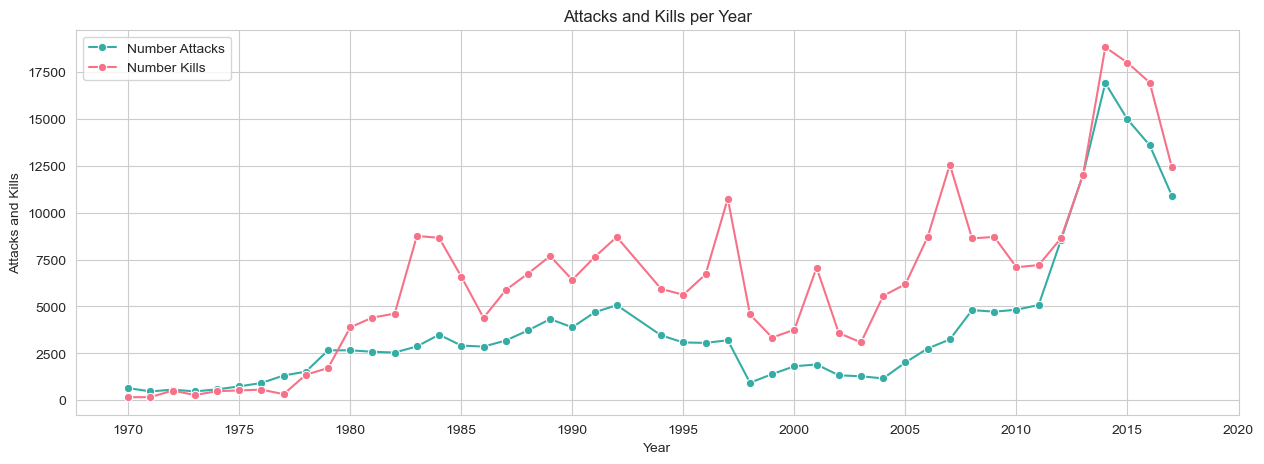

In [9]:
plt.figure(figsize=(15, 5))
sns.set_style('whitegrid')
palette = sns.color_palette('husl', 2)

sns.lineplot(x=count.index, y=count.values, marker='o', color=palette[1], label='Number Attacks')
sns.lineplot(x=attacks_sum.index, y=attacks_sum.values, marker='o', color=palette[0], label='Number Kills')

plt.xlabel('Year')
plt.ylabel('Attacks and Kills')
plt.title('Attacks and Kills per Year')
plt.legend()
plt.xticks(range(1970, 2023, 5)) 
plt.show()

In [10]:

def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def diagrama_caixa(coluna, y):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(25, 5)
    sns.boxplot(x=coluna, y=y, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, y=y, ax=ax2)

def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.distplot(coluna, hist=True)

def grafico_barra(coluna):  
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(y=coluna.value_counts().head(20).index, x=coluna.value_counts().head(20))
    #ax.set_xlim(limites(coluna))

In [11]:
new_df.drop(columns=['INT_LOG',	'INT_IDEO',	'INT_MISC',	'INT_ANY', 'latitude', 'longitude', 'crit2', 'crit3'], inplace=True)

C:\Users\fer_l\AppData\Local\Temp\ipykernel_3836\2420814938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns=['INT_LOG',	'INT_IDEO',	'INT_MISC',	'INT_ANY', 'latitude', 'longitude', 'crit2', 'crit3'], inplace=True)


C:\Users\fer_l\AppData\Local\Temp\ipykernel_3836\3674364184.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr(), annot=True, cmap='Greens')


<Axes: >

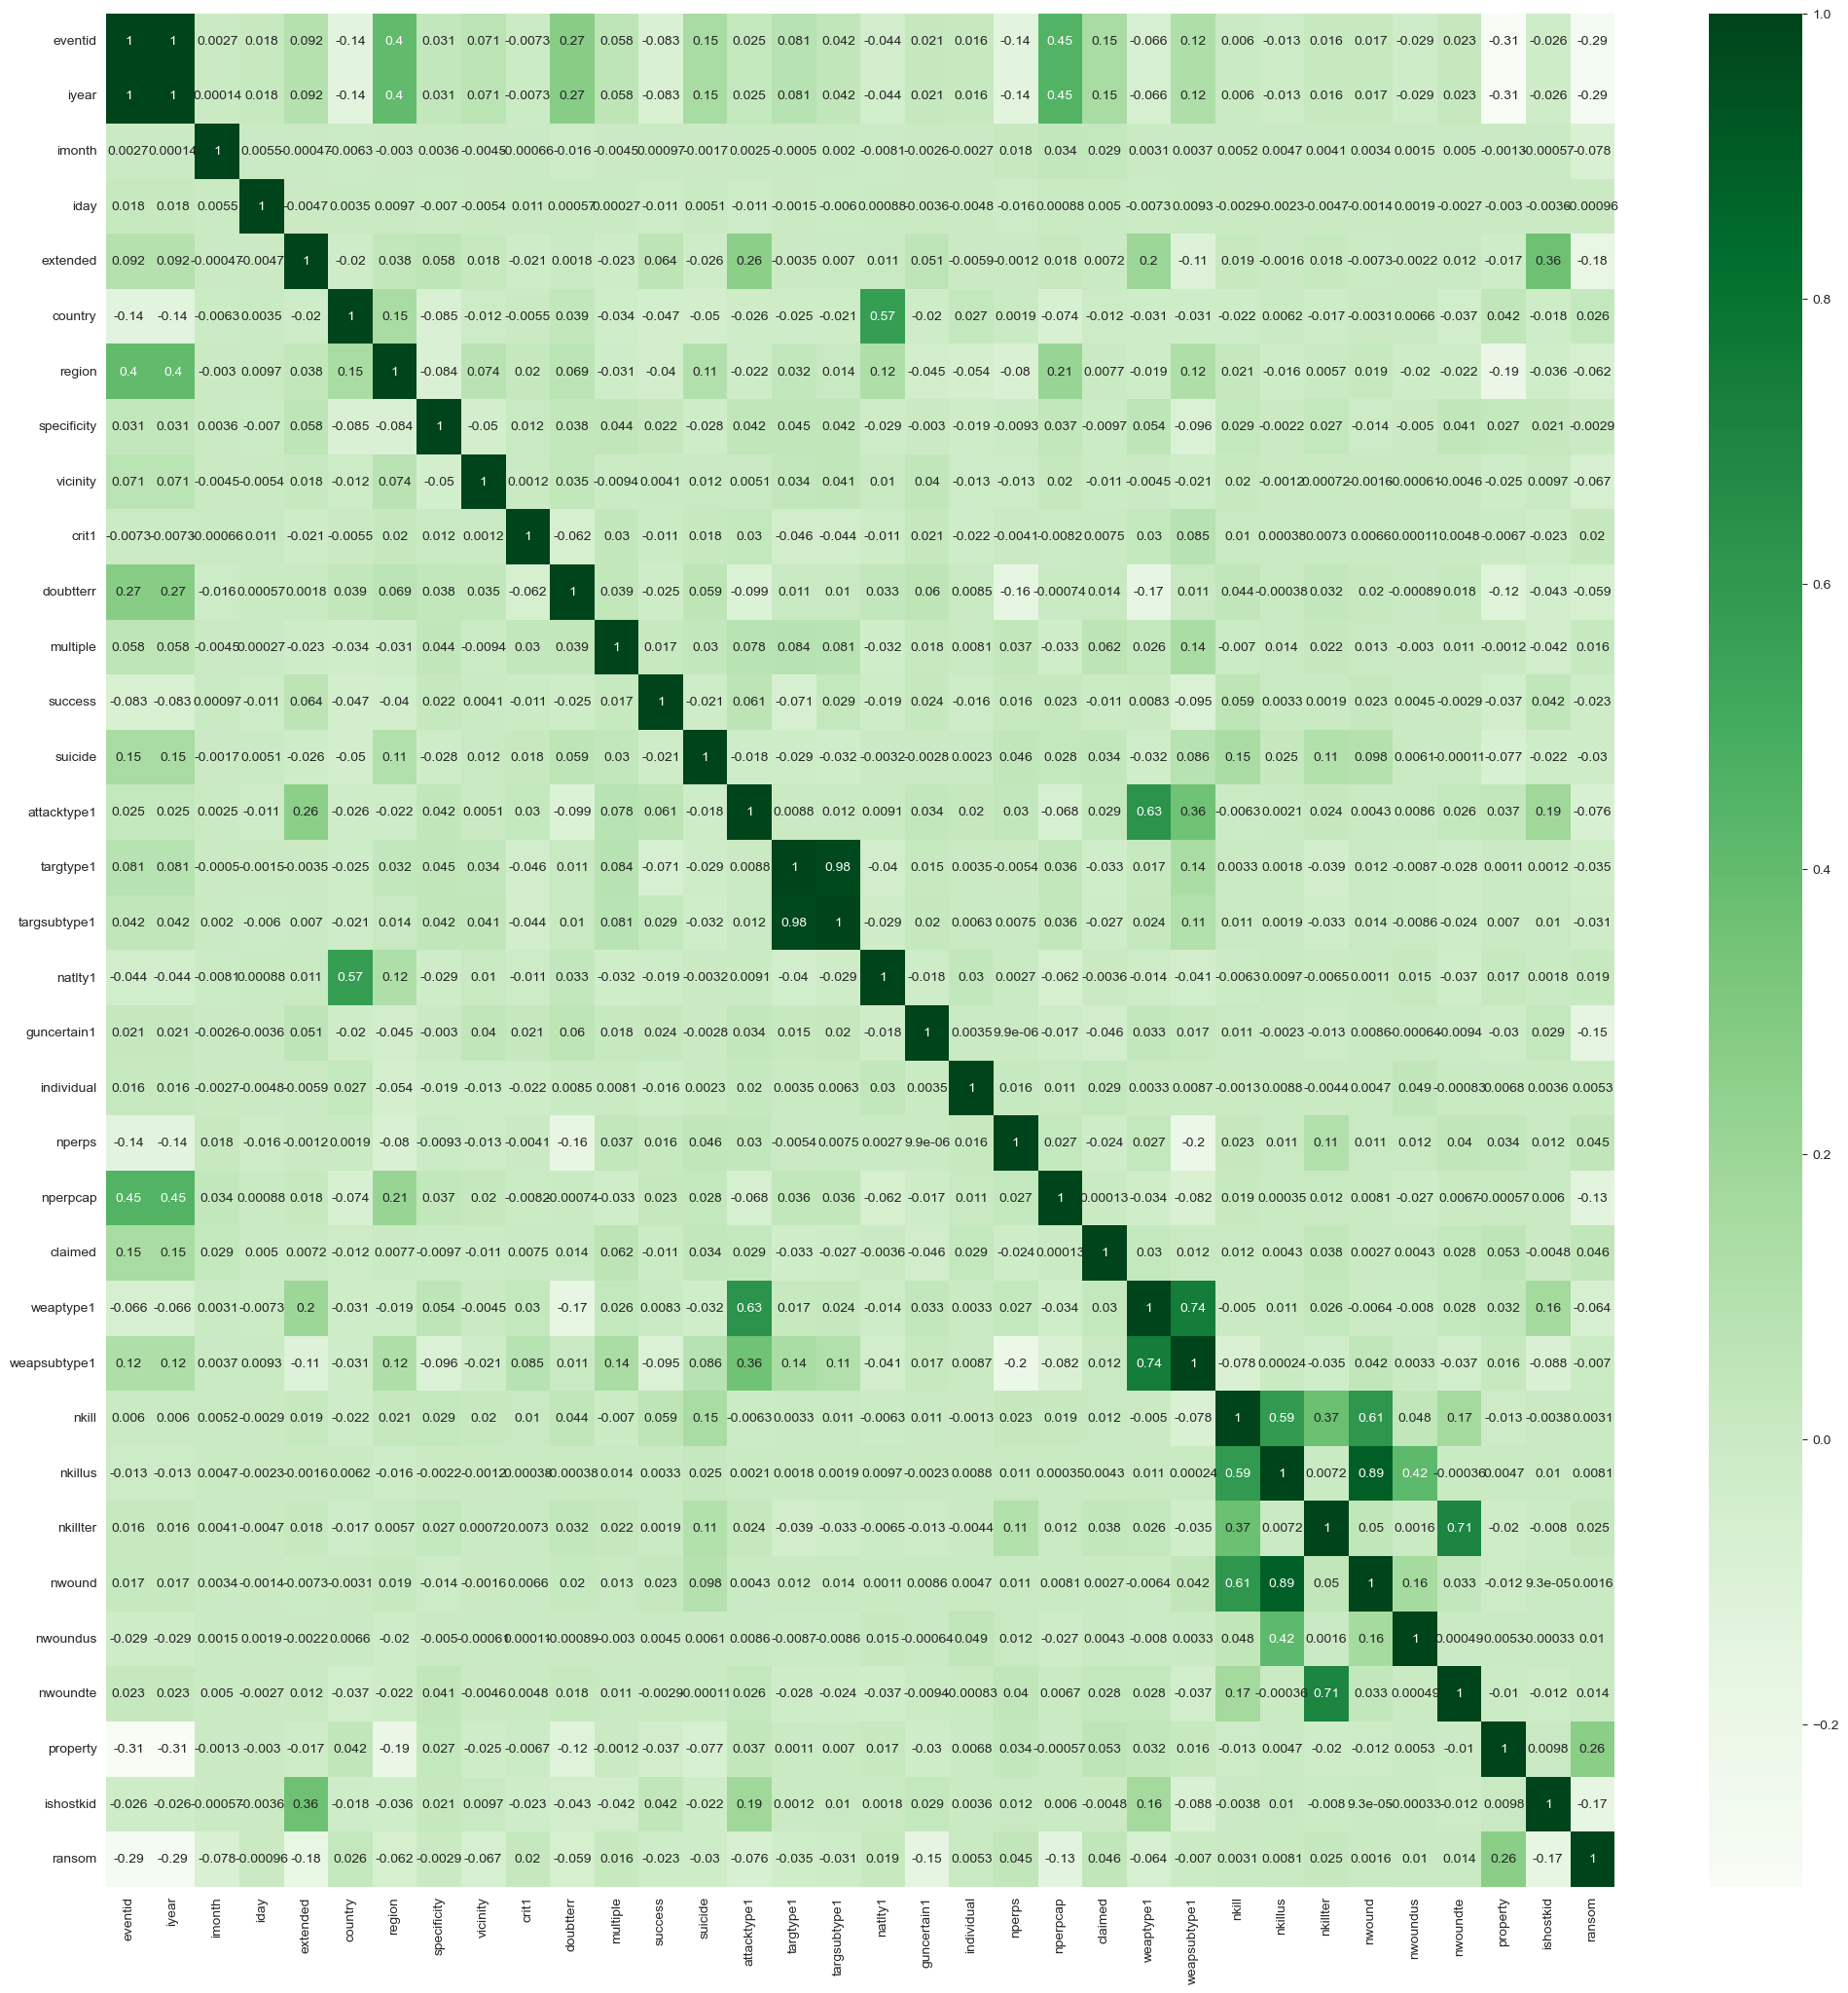

In [12]:
plt.figure(figsize=(25, 25))
sns.heatmap(new_df.corr(), annot=True, cmap='Greens')

C:\Users\fer_l\AppData\Local\Temp\ipykernel_3836\4115616224.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coluna, hist=True)


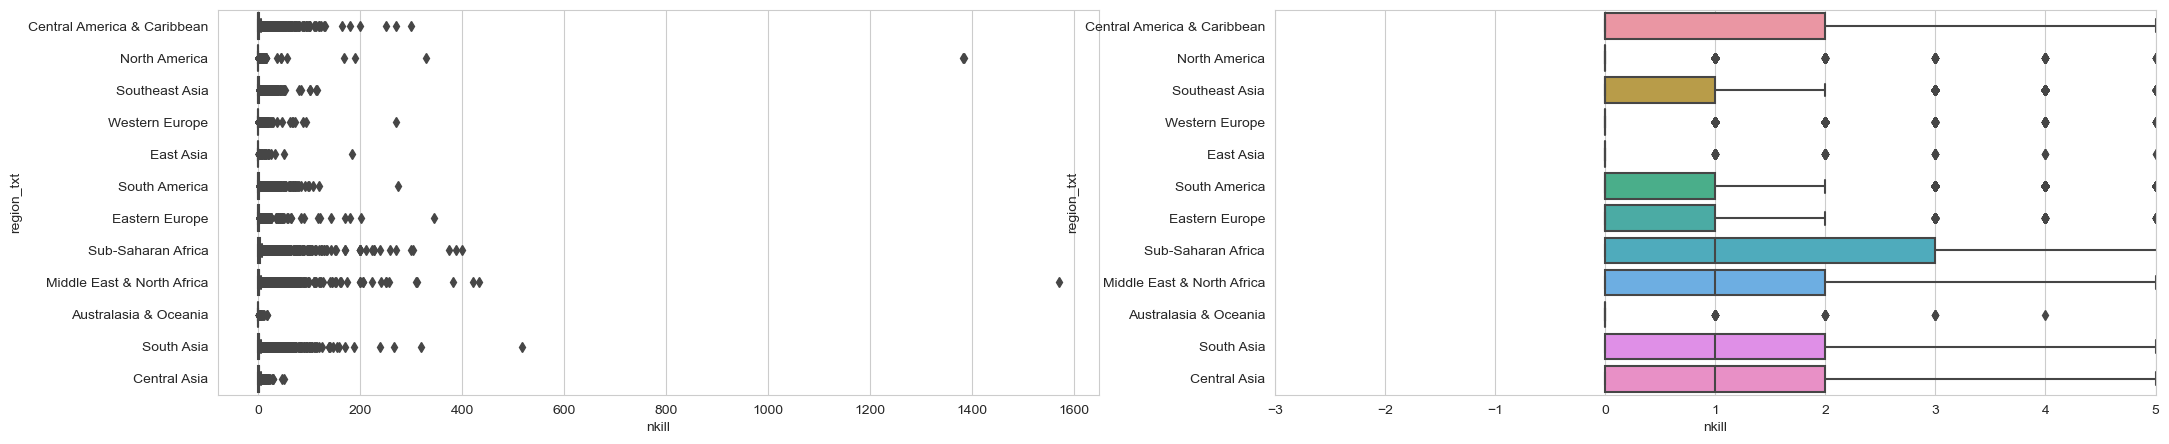

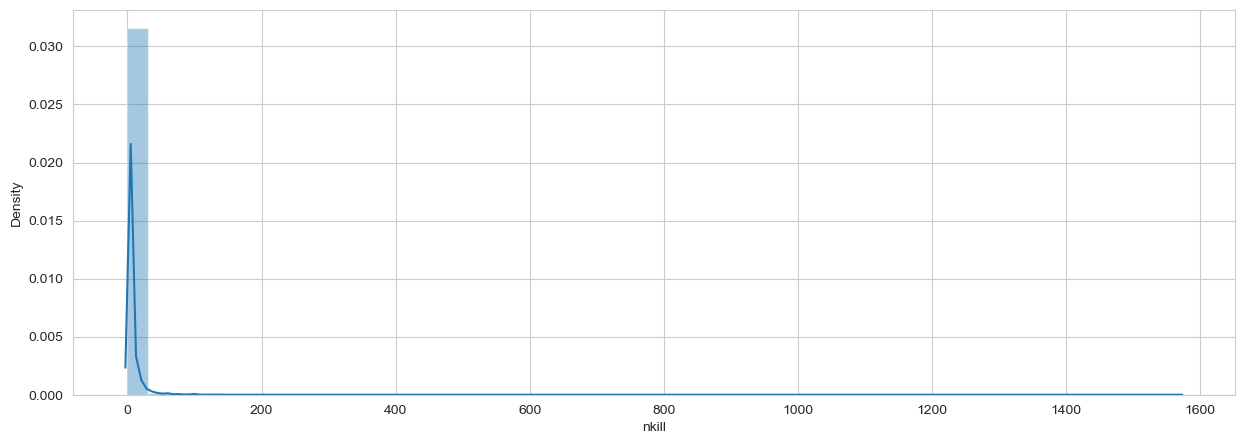

In [13]:
diagrama_caixa(new_df['nkill'], new_df['region_txt'])
histograma(new_df['nkill'])

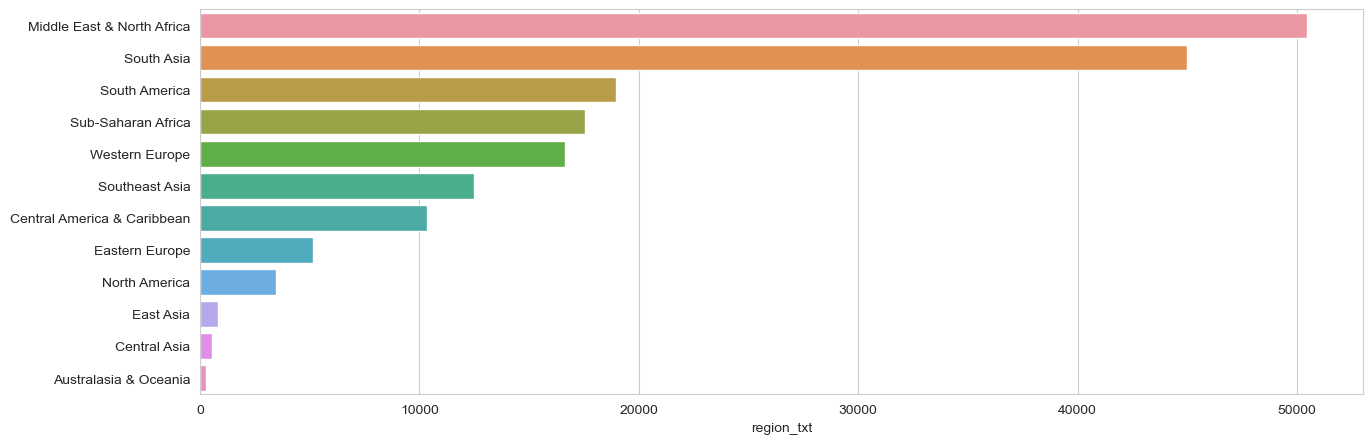

In [14]:
grafico_barra(new_df['region_txt'])

In [15]:
print(new_df['region_txt'].value_counts(normalize=True))

Middle East & North Africa     0.277797
South Asia                     0.247532
South America                  0.104453
Sub-Saharan Africa             0.096593
Western Europe                 0.091579
Southeast Asia                 0.068716
Central America & Caribbean    0.056932
Eastern Europe                 0.028312
North America                  0.019021
East Asia                      0.004414
Central Asia                   0.003099
Australasia & Oceania          0.001552
Name: region_txt, dtype: float64


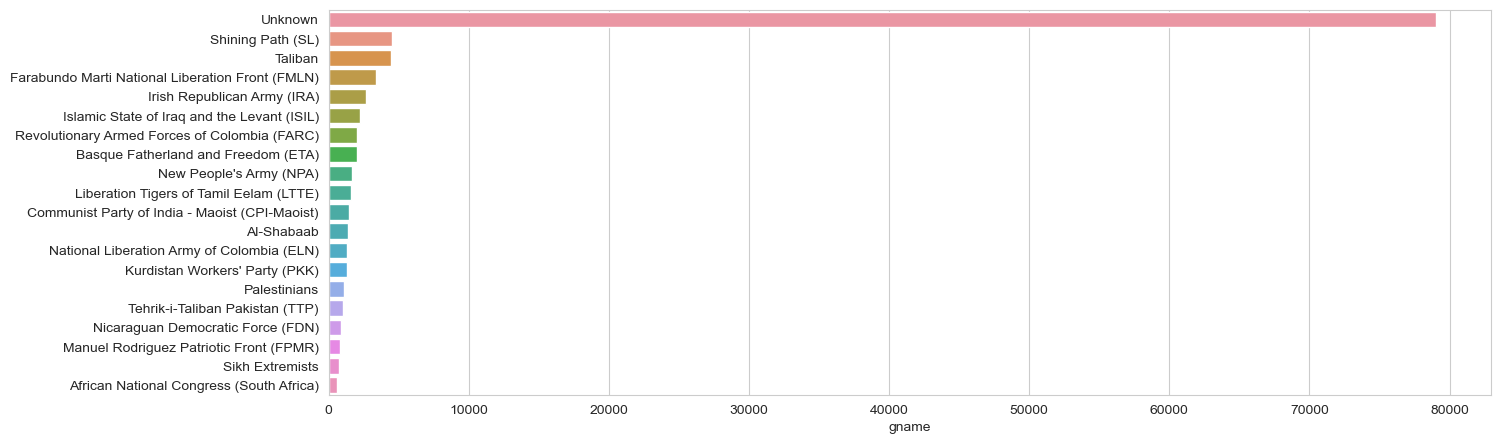

In [16]:
grafico_barra(new_df['gname'])

In [17]:
#analysing the period between 2010 and 2015 (rising of attacks)
df_10_15 = new_df[(new_df['iyear']>=2010) & (new_df['iyear']<=2015)]


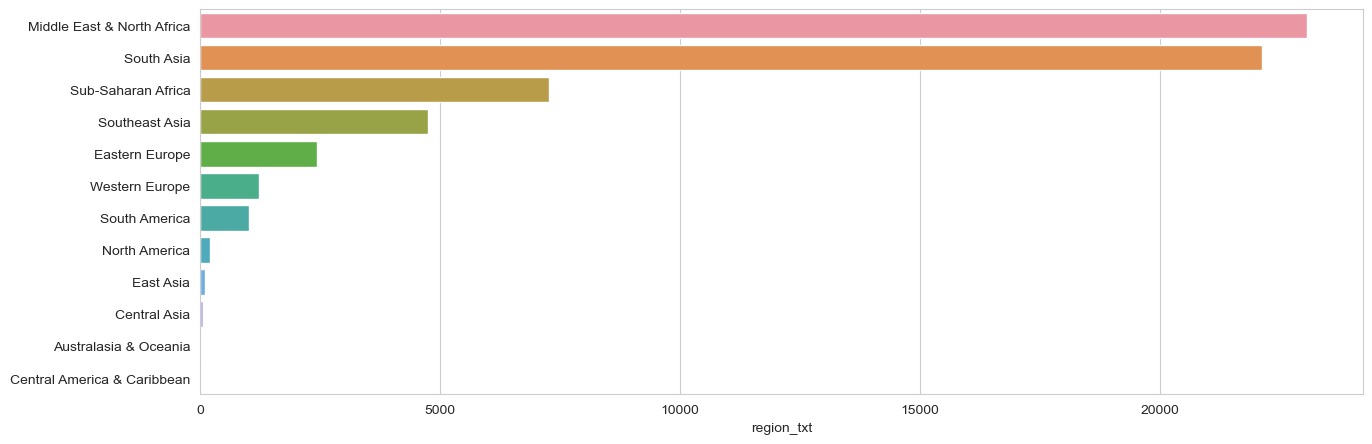

In [18]:
grafico_barra(df_10_15['region_txt'])

We can see that between 2010 and 2015 there was an increase in the number of attacks and consequently deaths. More than half of attacks (52.5%) are concentrated in the Middle East & North Africa and South Asia.

Let's do a deepdive in Middle East & North Africa

In [19]:
#filtering Middle East & North Africa
MeNa = df_10_15[(df_10_15['region_txt'].isin(['Middle East & North Africa']))]
print(len(MeNa))

23069


In [20]:
top10 = MeNa['gname'].value_counts(ascending=False).head(10)
print(top10)

Unknown                                        13890
Islamic State of Iraq and the Levant (ISIL)     1051
Al-Qaida in Iraq                                 378
Al-Qaida in the Arabian Peninsula (AQAP)         318
Al-Nusrah Front                                  126
Kurdistan Workers' Party (PKK)                   123
Sinai Province of the Islamic State              122
Hamas (Islamic Resistance Movement)               63
Houthi extremists (Ansar Allah)                   54
Gunmen                                            48
Name: gname, dtype: int64


In [21]:
#filtering grups with more than 100 attacks
print(top10.index.tolist())

['Unknown', 'Islamic State of Iraq and the Levant (ISIL)', 'Al-Qaida in Iraq', 'Al-Qaida in the Arabian Peninsula (AQAP)', 'Al-Nusrah Front', "Kurdistan Workers' Party (PKK)", 'Sinai Province of the Islamic State', 'Hamas (Islamic Resistance Movement)', 'Houthi extremists (Ansar Allah)', 'Gunmen']


In [22]:
MeNa_TopGname = MeNa[MeNa['gname'].isin(['Unknown', 'Islamic State of Iraq and the Levant (ISIL)', 'Al-Qaida in Iraq', 'Al-Qaida in the Arabian Peninsula (AQAP)', 'Al-Nusrah Front', "Kurdistan Workers' Party (PKK)", 'Sinai Province of the Islamic State'])]

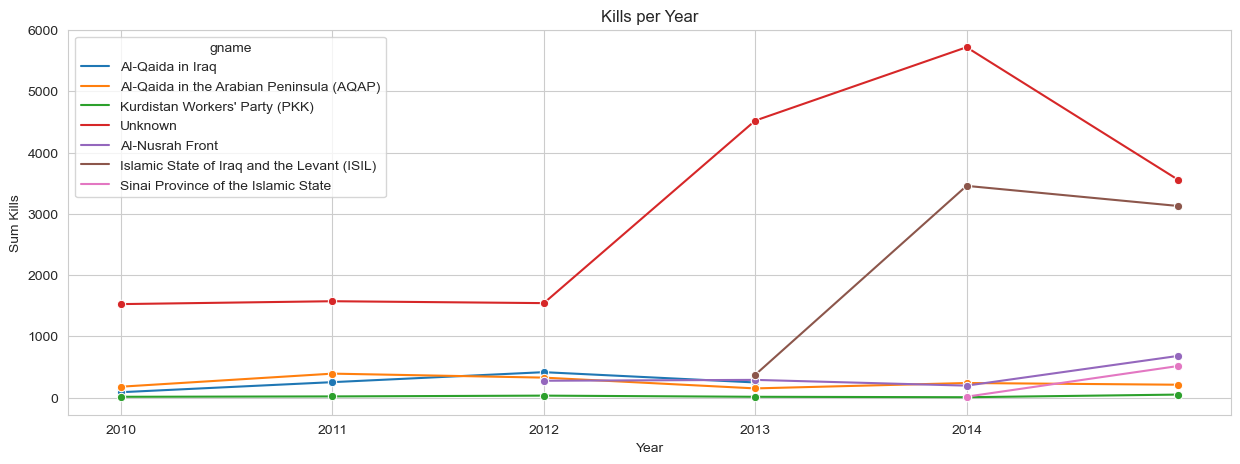

In [23]:
# Creating a lineplot with kill per top gname
kilss_df = MeNa_TopGname.groupby(['iyear', 'gname'])['nkill'].sum().reset_index()

plt.figure(figsize=(15, 5))
sns.lineplot(x='iyear', y='nkill', marker='o', hue='gname', data=kilss_df)
plt.xlabel('Year')
plt.ylabel('Sum Kills')
plt.title('Kills per Year')
plt.xticks(range(2010, 2015, 1)) 
plt.show()

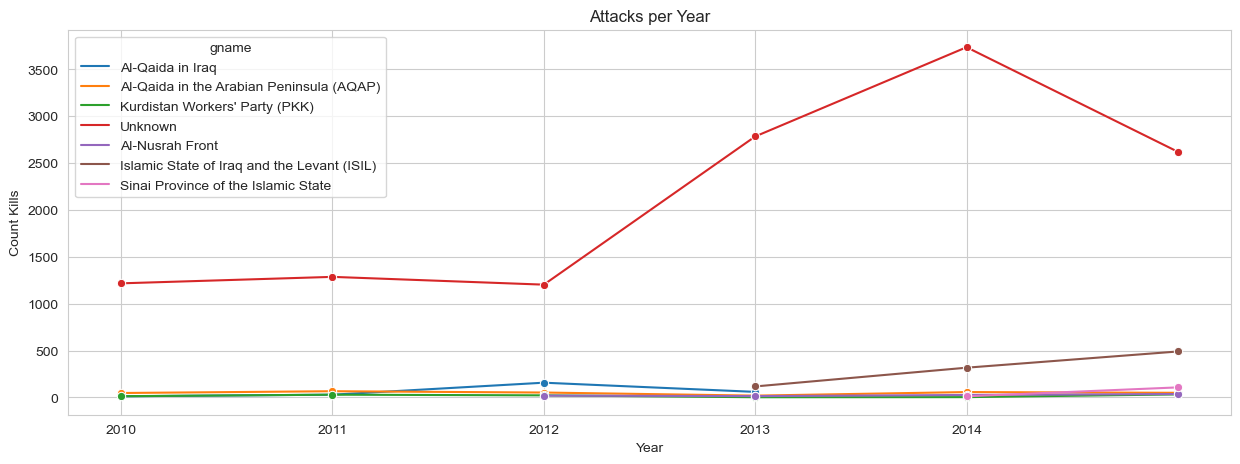

In [24]:
# Creating a lineplot with attacks per top gname
attacks_df = MeNa_TopGname.groupby(['iyear', 'gname'])['nkill'].count().reset_index()

plt.figure(figsize=(15, 5))
sns.lineplot(x='iyear', y='nkill', marker='o', hue='gname', data=attacks_df)
plt.xlabel('Year')
plt.ylabel('Count Kills')
plt.title('Attacks per Year')
plt.xticks(range(2010, 2015, 1))
plt.show()

In [25]:
attacks_df = attacks_df.rename(columns={'nkill':'attacks'})

df_fatal =  pd.merge(attacks_df, kilss_df, on=['iyear', 'gname'], how='inner')

df_fatal['fatality'] = df_fatal['nkill'] / df_fatal['attacks']

In [26]:
print(df_fatal)

    iyear                                        gname  attacks   nkill  \
0    2010                             Al-Qaida in Iraq       12    88.0   
1    2010     Al-Qaida in the Arabian Peninsula (AQAP)       47   178.0   
2    2010               Kurdistan Workers' Party (PKK)       13    13.0   
3    2010                                      Unknown     1217  1526.0   
4    2011                             Al-Qaida in Iraq       29   252.0   
5    2011     Al-Qaida in the Arabian Peninsula (AQAP)       66   391.0   
6    2011               Kurdistan Workers' Party (PKK)       29    19.0   
7    2011                                      Unknown     1286  1573.0   
8    2012                              Al-Nusrah Front       19   275.0   
9    2012                             Al-Qaida in Iraq      157   415.0   
10   2012     Al-Qaida in the Arabian Peninsula (AQAP)       52   326.0   
11   2012               Kurdistan Workers' Party (PKK)       22    32.0   
12   2012                

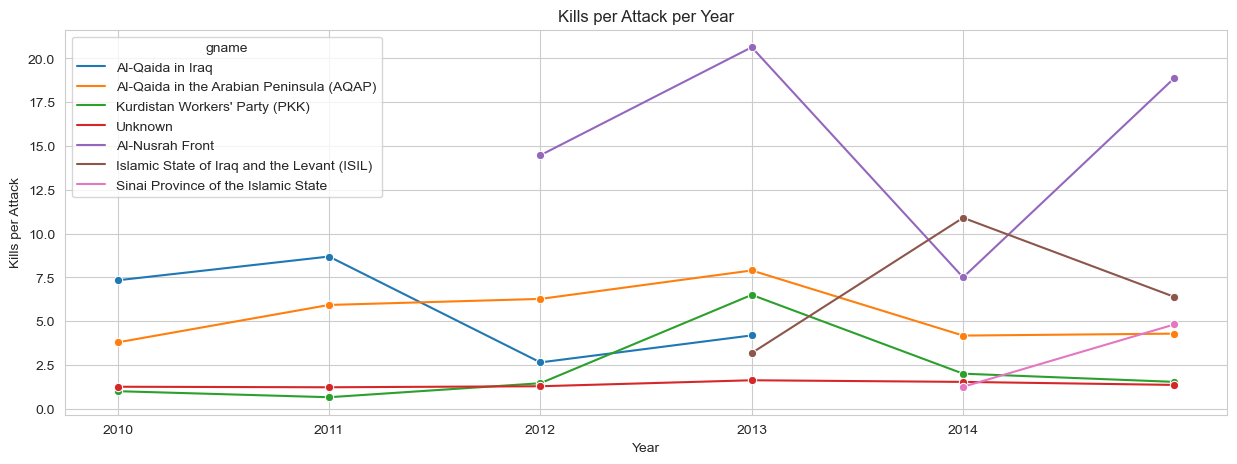

In [27]:
df_fatal = df_fatal.groupby(['iyear', 'gname'])['fatality'].mean().reset_index()

plt.figure(figsize=(15, 5))
sns.lineplot(x='iyear', y='fatality', marker='o', hue='gname', data=df_fatal)
plt.xlabel('Year')
plt.ylabel('Kills per Attack')
plt.title('Kills per Attack per Year')
plt.xticks(range(2010, 2015, 1))
plt.show()

We can conclude that the Al-Nusrah Front, ISIL and AQAP groups have a higher fatality rate (deaths per number of attacks).

Let's look for some patterns in the other variables.

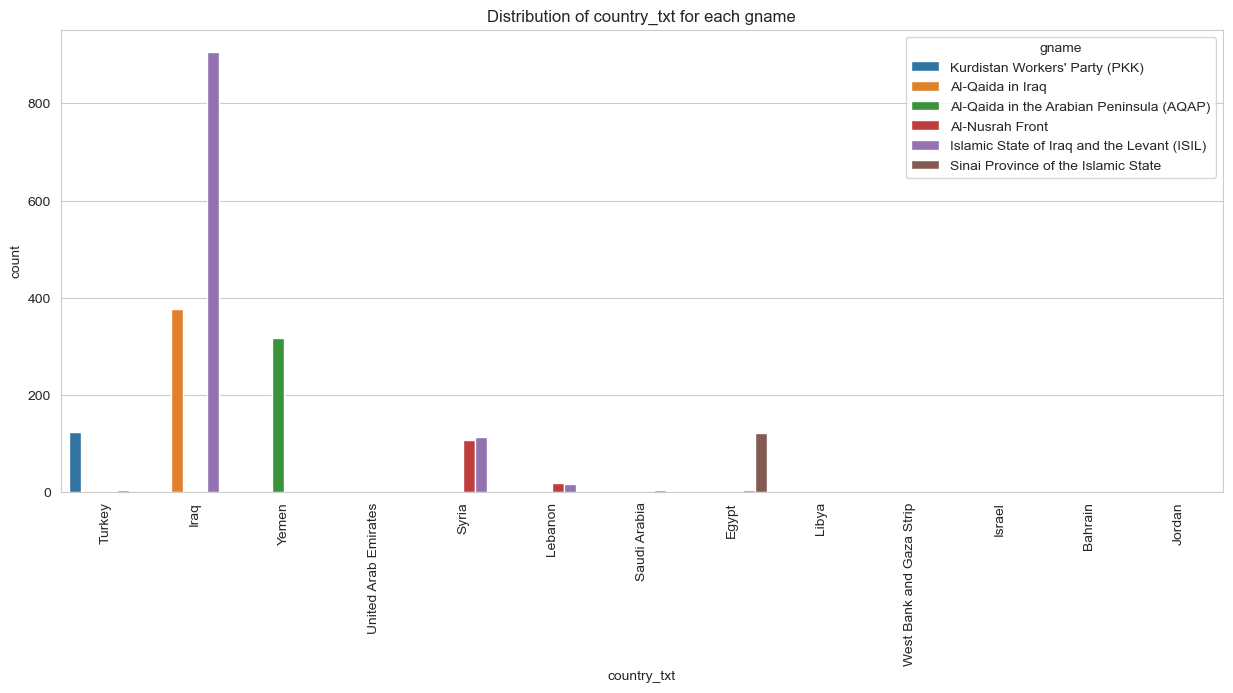

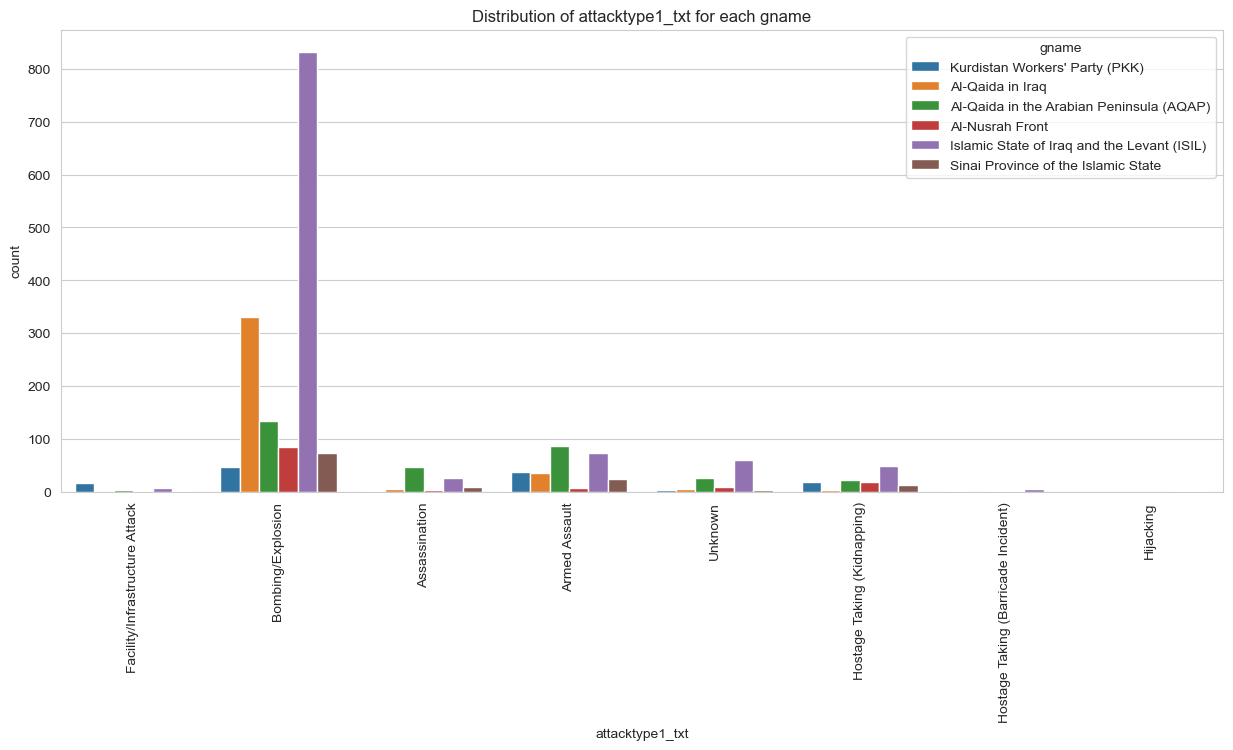

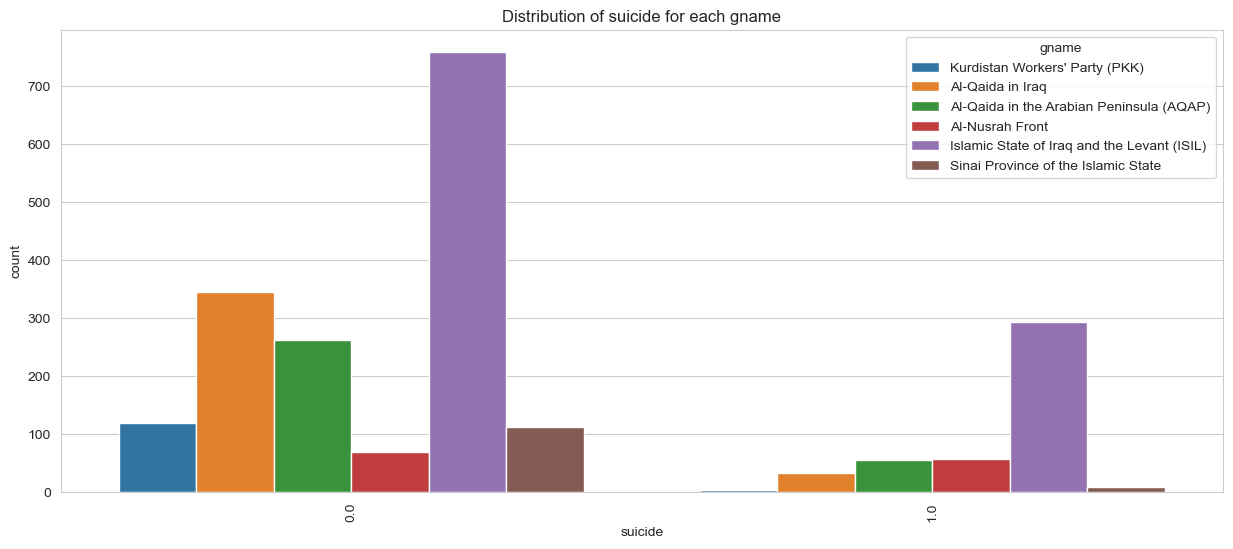

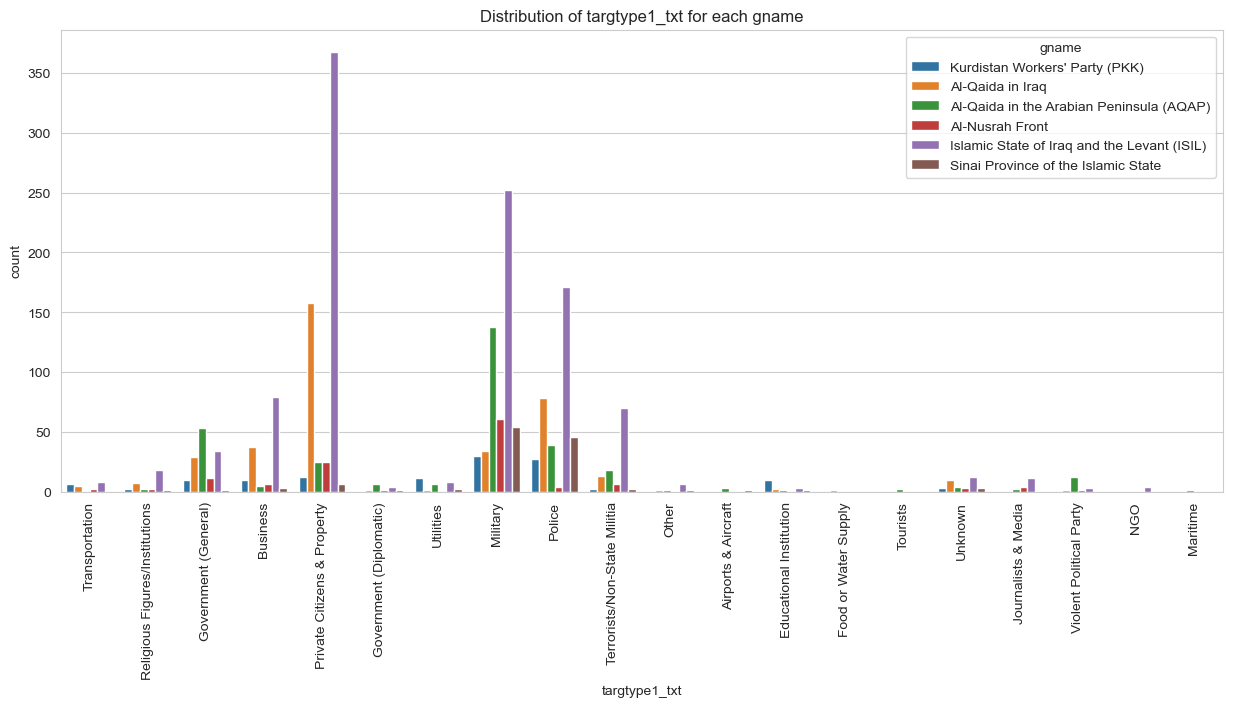

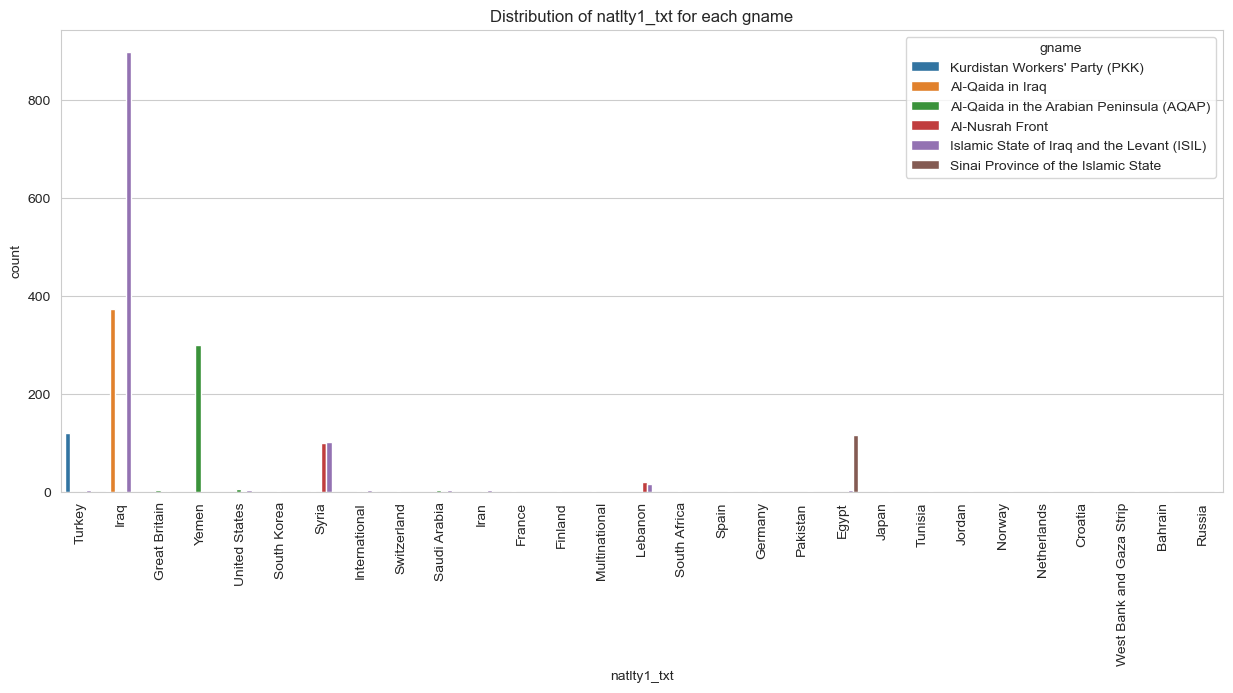

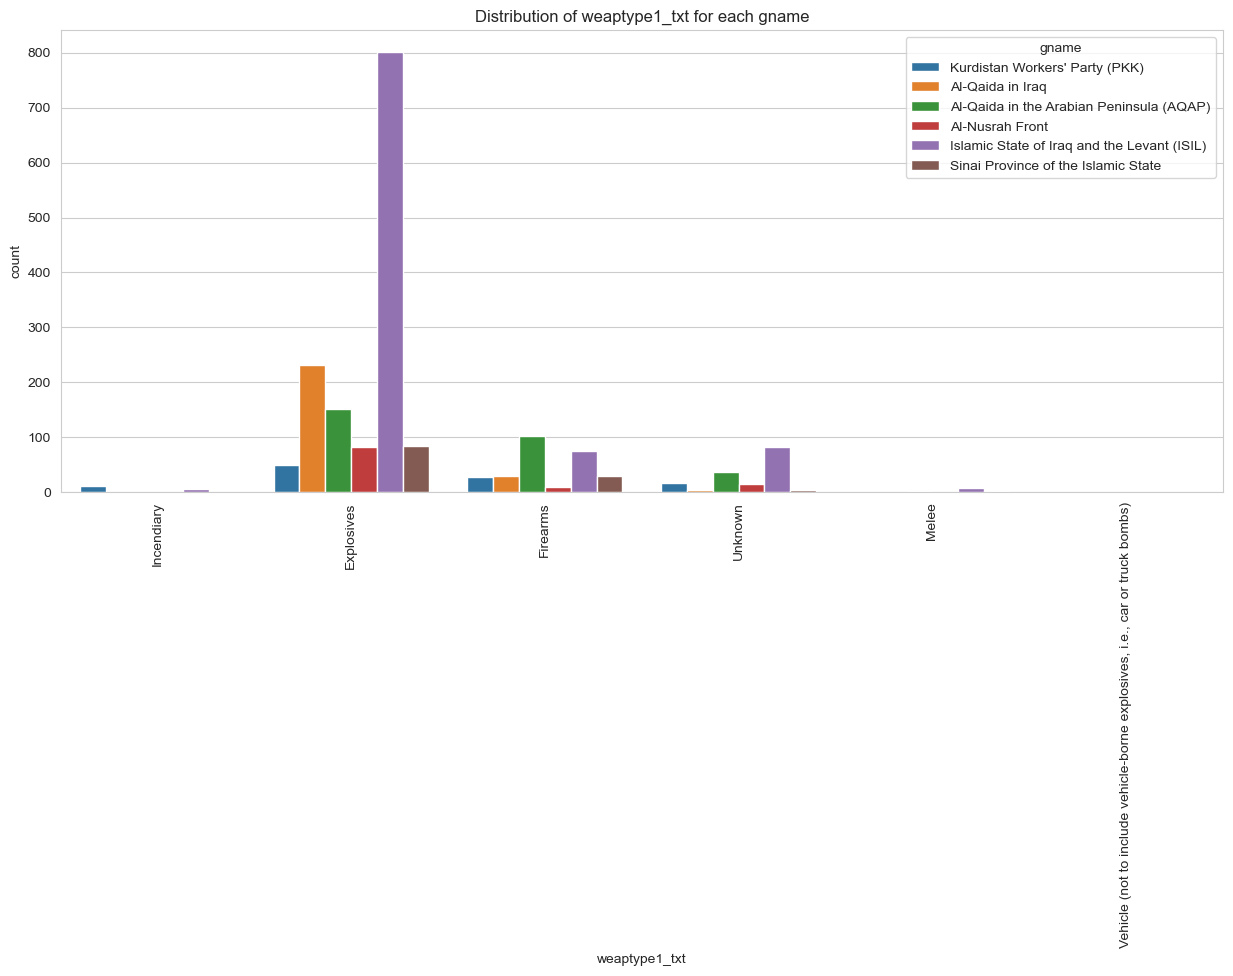

In [28]:
#excluding unknowm for better visualization. 
categories = ['country_txt', 'attacktype1_txt', 'suicide', 'targtype1_txt', 'natlty1_txt', 'weaptype1_txt']

MeNa_TopGname = MeNa_TopGname[MeNa_TopGname['gname']!='Unknown']

for variavel in categories:
    plt.figure(figsize=(15, 6))
    sns.countplot(x=variavel, hue='gname', data= MeNa_TopGname)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {variavel} for each gname')

Both groups have a high concentration of attacks on military targets.

Question : Is there a significant difference in the average number of kills per terrorist attacks?

Hypotheses:

Null Hypothesis (H0): There is no significant difference between military targets and others targets.

Alternative Hypothesis (H1): Attacks on military targets result in more deaths.

We will use the independent two-sample t-test from the scipy.stats library, with the aim of comparing the 'nkill' of each dataframe created and thus testing the hypotheses.

In [ ]:
# Separate data for known groups and unknown groups
new_df['nkill'] = new_df['nkill'].fillna(0)
military_attacks = new_df[new_df['targtype1_txt'] == 'Military']
non_military_attacks = new_df[new_df['targtype1_txt'] != 'Military']

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(military_attacks['nkill'], non_military_attacks['nkill'], equal_var=False)

# Print the results
print("Two-Sample T-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Determine significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print("H0 rejected: Attacks carried out on military targets have a higher number of deaths.")
else:
    print("H0 not rejected: There is no difference in the number of deaths between attacks on military targets and others.")

C:\Users\fer_l\AppData\Local\Temp\ipykernel_8360\2511112668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['nkill'] = new_df['nkill'].fillna(0)


Two-Sample T-Test Results:
T-Statistic: 21.910966473446642
P-Value: 2.3994785839657357e-105
H0 rejected: Attacks carried out on military targets have a higher number of deaths.
